# Neural Network Architecture BaseLine

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf 

In [2]:
df = pd.read_csv('WORLD-OWID-Features')

df

,year,cement_co2,co2,coal_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2
0,1750,317.372711,9.351,9.351,256.309556,1814.698707,4316.805465,3625.609168,82.069576
1,1751,317.372711,9.351,9.351,256.309556,1814.698707,4316.805465,3625.609168,82.069576
2,1752,317.372711,9.354,9.354,256.309556,1814.698707,4316.805465,3625.609168,82.069576
3,1753,317.372711,9.354,9.354,256.309556,1814.698707,4316.805465,3625.609168,82.069576
4,1754,317.372711,9.358,9.358,256.309556,1814.698707,4316.805465,3625.609168,82.069576
...,...,...,...,...,...,...,...,...,...
267,2017,1507.923000,36096.738,14506.974,391.992000,7144.928000,4331.947000,12242.628000,302.294000
268,2018,1569.218000,36826.508,14746.831,412.116000,7529.847000,4181.356000,12266.017000,302.479000
269,2019,1617.507000,37082.559,14725.978,439.254000,7647.528000,4557.283000,12345.653000,306.639000
270,2020,1637.537000,35264.086,14174.564,407.584000,7556.290000,4057.758000,11191.809000,296.302000


Doing some small manually feature analysis based upon other projects 

In [3]:
#features_to_keep = ['year', 'co2', 'population', 'gdp', 'cement_co2', 'primary_energy_consumption', 'share_global_cumulative_gas_co2', 'share_global_cumulative_coal_co2', 'share_global_cumulative_flaring_co2', 'share_global_cumulative_oil_co2']

# df = df[features_to_keep]

Defining our X and Y 

In [4]:
X = df.drop('co2', axis=1)
y = df['co2']
y

0          9.351
1          9.351
2          9.354
3          9.354
4          9.358
         ...    
267    36096.738
268    36826.508
269    37082.559
270    35264.086
271    37123.852
Name: co2, Length: 272, dtype: float64

In [5]:
df.columns

Index(['year', 'cement_co2', 'co2', 'coal_co2', 'flaring_co2', 'gas_co2',
       'land_use_change_co2', 'oil_co2', 'other_industry_co2'],
      dtype='object')

Splitting our Data 

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(190, 8)
(82, 8)
(190,)
(82,)


Scaling our Data 

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)
# y = scaler.fit_transform(y.values.reshape(-1, 1))

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Structuring our Model 

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ReLU

input_size = X_train.shape[1]

model = Sequential()

model.add(Dense(10, activation='relu', input_dim=input_size))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                90        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 211 (844.00 Byte)
Trainable params: 211 (844.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compiling our model

In [10]:
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

Training our model 

In [11]:
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
5/5 [==============================] - 0s 14ms/step - loss: 6495.7559 - mean_absolute_error: 6495.7559 - val_loss: 8439.0732 - val_mean_absolute_error: 8439.0732
Epoch 2/50
5/5 [==============================] - 0s 3ms/step - loss: 6495.6475 - mean_absolute_error: 6495.6475 - val_loss: 8438.9541 - val_mean_absolute_error: 8438.9541
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 6495.5371 - mean_absolute_error: 6495.5371 - val_loss: 8438.8311 - val_mean_absolute_error: 8438.8311
Epoch 4/50
5/5 [==============================] - 0s 3ms/step - loss: 6495.4224 - mean_absolute_error: 6495.4224 - val_loss: 8438.7031 - val_mean_absolute_error: 8438.7031
Epoch 5/50
5/5 [==============================] - 0s 3ms/step - loss: 6495.3003 - mean_absolute_error: 6495.3003 - val_loss: 8438.5674 - val_mean_absolute_error: 8438.5674
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 6495.1719 - mean_absolute_error: 6495.1719 - val_loss: 8438.4238 - va

Making predictions with our baseline model 

In [12]:
y_pred = model.predict(X_test_scaled)

3/3 [==============================] - 0s 699us/step


Visualizing the outcoms 

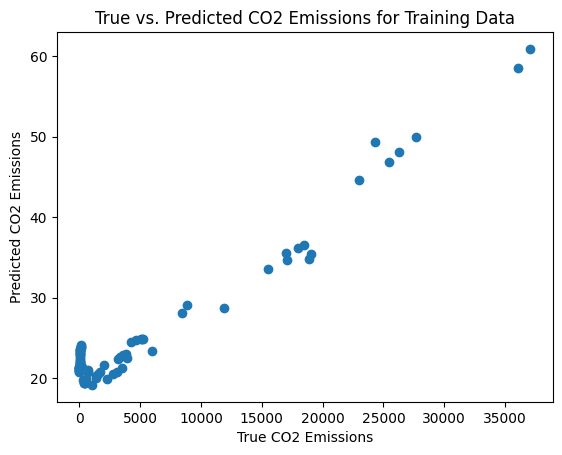

In [13]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('True CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('True vs. Predicted CO2 Emissions for Training Data')
plt.show()

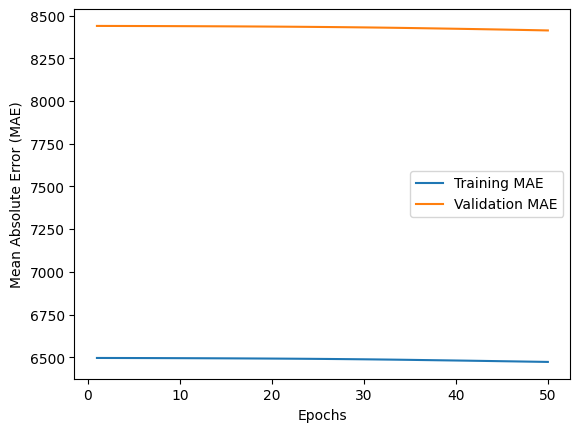

In [14]:
# Access MAE from the training and validation data
train_mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

# number of epochs
epochs = range(1, len(train_mae) + 1)

# Plot MAEs against each other
plt.plot(epochs, train_mae, label='Training MAE')
plt.plot(epochs, val_mae, label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.show()

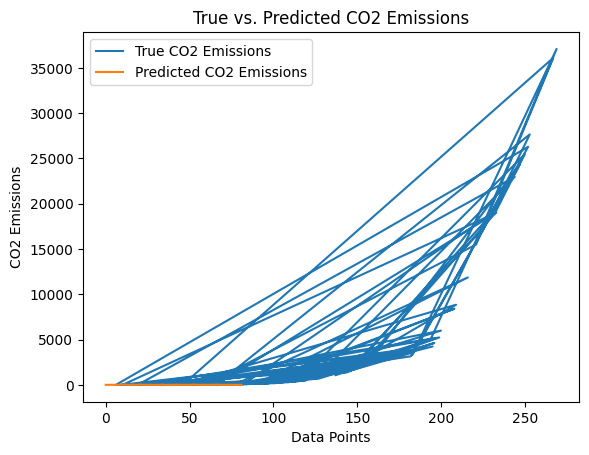

In [15]:
# Plot the true values and predicted values as separate lines
plt.plot(y_test, label='True CO2 Emissions')
plt.plot(y_pred, label='Predicted CO2 Emissions')
plt.xlabel('Data Points')
plt.ylabel('CO2 Emissions')
plt.title('True vs. Predicted CO2 Emissions')
plt.legend()
plt.show()

Comparing our predictions using the R2 Metric

In [16]:
from sklearn.metrics import r2_score

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

R2 Score= -0.34358558502298897


Comparing our predictions using the MSE metric

In [17]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(" Root Mean Squared Error (MSE) =", rmse)

 Root Mean Squared Error (MSE) = 10260.116356975095


In [18]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute error (MAE) =", mae)

Mean Absolute error (MAE) = 5205.9455398038535


In [19]:
y_pred.shape


(82, 1)

In [20]:
y_test.shape

(82,)

# Visualizing which featue contributed the most to predicting the co2 emission

In [21]:
# Getting our updated weights of our final layer 
output_layer_weights = model.layers[-1].get_weights()[0]

# Calculating the absolute weights 
absolute_weights = abs(output_layer_weights)

# Putting them together in a list with their names 
feature_names = list(X.columns)

# We will make a dictionary to connect our feature names with their corresponding absolute weight input against co2
feature_weights_dict = dict(zip(feature_names, absolute_weights))

# Sorting from best to worst 
sorted_feature_weights = sorted(feature_weights_dict.items(), key=lambda x: x[1], reverse=True)

for feature, weight in sorted_feature_weights:
    print(f"Feature: {feature}, Absolute Weight: {weight}")

Feature: cement_co2, Absolute Weight: [1.1213723]
Feature: gas_co2, Absolute Weight: [1.1034086]
Feature: coal_co2, Absolute Weight: [0.9779095]
Feature: land_use_change_co2, Absolute Weight: [0.5848678]
Feature: oil_co2, Absolute Weight: [0.5673048]
Feature: flaring_co2, Absolute Weight: [0.5528776]
Feature: year, Absolute Weight: [0.48909044]
Feature: other_industry_co2, Absolute Weight: [0.4191772]


In [22]:
'''import matplotlib.pyplot as plt

# Assuming you have already predicted the CO2 emissions and stored them in y_pred

# Inverse transform y_pred and y_test to bring them back to their original scale
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)

# Reset the index of the DataFrame to ensure alignment with y_pred_original and y_test_original
df_reset_index = df.reset_index(drop=True)

# Create a new DataFrame to hold the last 30% of the years and corresponding y_pred and y_test
last_30_percent = int(len(df) * 0.3+1)
result_df = pd.DataFrame({
    'Year': df['year'].iloc[-last_30_percent:],
    'Actual CO2 Emissions': y_test_original.flatten(),
    'Predicted CO2 Emissions': y_pred_original.flatten()
})

# Sort the DataFrame by the year
result_df = result_df.sort_values(by='Year')

# Plot the relationship between predicted and actual CO2 emissions over the years
plt.plot(result_df['Year'], result_df['Actual CO2 Emissions'], label='Actual CO2 Emissions')
plt.plot(result_df['Year'], result_df['Predicted CO2 Emissions'], label='Predicted CO2 Emissions')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.title('Actual vs. Predicted CO2 Emissions over the Years')
plt.show()'''

"import matplotlib.pyplot as plt\n\n# Assuming you have already predicted the CO2 emissions and stored them in y_pred\n\n# Inverse transform y_pred and y_test to bring them back to their original scale\ny_pred_original = scaler.inverse_transform(y_pred)\ny_test_original = scaler.inverse_transform(y_test)\n\n# Reset the index of the DataFrame to ensure alignment with y_pred_original and y_test_original\ndf_reset_index = df.reset_index(drop=True)\n\n# Create a new DataFrame to hold the last 30% of the years and corresponding y_pred and y_test\nlast_30_percent = int(len(df) * 0.3+1)\nresult_df = pd.DataFrame({\n    'Year': df['year'].iloc[-last_30_percent:],\n    'Actual CO2 Emissions': y_test_original.flatten(),\n    'Predicted CO2 Emissions': y_pred_original.flatten()\n})\n\n# Sort the DataFrame by the year\nresult_df = result_df.sort_values(by='Year')\n\n# Plot the relationship between predicted and actual CO2 emissions over the years\nplt.plot(result_df['Year'], result_df['Actual CO2 

In [23]:
#import matplotlib.pyplot as plt

# Plot the relationship between "year" and "CO2 emissions"
#plt.scatter(df["year"], df["co2"])
#plt.xlabel("Year")
#plt.ylabel("CO2 Emissions")
#plt.title("CO2 Emissions over Time")
#plt.show()

In [24]:
'''from tensorflow.keras.callbacks import Callback

class CustomMSECallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        mse = logs['val_loss']  # Validation loss corresponds to MSE
        print(f"Epoch {epoch+1}: Average MSE = {mse:.4f}")

# Define the input size, hidden size, and output size
input_size = len(X_train.columns)  # Replace this with the actual number of input features
hidden_size = 64  # Number of neurons in the hidden layer
output_size = 1   # Number of output units (in this case, predicting CO2 emissions as a continuous value)

# Create the neural network model
model = Sequential([
    Dense(hidden_size, input_shape=(input_size,), activation='relu'),
    Dense(output_size)
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer)

# Create the custom callback
custom_callback = CustomMSECallback()

# Train the model with the custom callback
num_epochs = 100
batch_size = 64
history = model.fit(X_train.values, y_train.values, epochs=num_epochs, batch_size=batch_size, validation_split=0.2, callbacks=[custom_callback])

# Evaluate the model on the test data
test_loss = model.evaluate(X_test.values, y_test.values)
print(f"Average Test Loss: {test_loss:.4f}")'''

'from tensorflow.keras.callbacks import Callback\n\nclass CustomMSECallback(Callback):\n    def on_epoch_end(self, epoch, logs=None):\n        mse = logs[\'val_loss\']  # Validation loss corresponds to MSE\n        print(f"Epoch {epoch+1}: Average MSE = {mse:.4f}")\n\n# Define the input size, hidden size, and output size\ninput_size = len(X_train.columns)  # Replace this with the actual number of input features\nhidden_size = 64  # Number of neurons in the hidden layer\noutput_size = 1   # Number of output units (in this case, predicting CO2 emissions as a continuous value)\n\n# Create the neural network model\nmodel = Sequential([\n    Dense(hidden_size, input_shape=(input_size,), activation=\'relu\'),\n    Dense(output_size)\n])\n\n# Compile the model\noptimizer = tf.keras.optimizers.Adam(learning_rate=0.001)\nmodel.compile(loss=\'mean_squared_error\', optimizer=optimizer)\n\n# Create the custom callback\ncustom_callback = CustomMSECallback()\n\n# Train the model with the custom call